In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#%cd /content/drive/My Drive/
%cd "/content/drive/MyDrive/L2"

/content/drive/MyDrive/L2


In [8]:
%ls

'Cher Eng Lim - BatchNorm.ipynb'
'Cher Eng Lim - L2_Regulization.ipynb'
'Cher Eng Lim - test_signs.h5'
'Cher Eng Lim - train_signs.h5'
'Cher Eng Lim - Week02 - Coding Assignment - L1L2 Regularization.ipynb'


#Import nessessary libraries

In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt

import keras 
from keras.models import Sequential
from keras.layers import Dense

from keras import initializers, regularizers, optimizers

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 7.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [12]:
def load_dataset():
    train_dataset = h5py.File('Cher Eng Lim - train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    #test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_dataset = h5py.File('Cher Eng Lim - test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # list of classes
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

#Data: SIGNS Dataset

We have two sets of data. Each sample is an image of size $64\times 64$ pixels. 

- **Training set**: $1080$ samples of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: $120$ samples of signs representing numbers from 0 to 5 (20 pictures per number).

This is only a subset of the SIGNS dataset. The complete dataset contains many more signs.

In [13]:
# Loading the dataset
X_train_orig, y_train_orig, X_test_orig, y_test_orig, classes = load_dataset()

Let's print out the sizes of data.

In [14]:
print("Training set")
print("Size of X_train:", X_train_orig.shape)
print("Size of y_train:", y_train_orig.shape)

print("\nTest set")
print("Size of X_test:", X_test_orig.shape)
print("Size of y_test:", y_test_orig.shape)

Training set
Size of X_train: (1080, 64, 64, 3)
Size of y_train: (1080,)

Test set
Size of X_test: (120, 64, 64, 3)
Size of y_test: (120,)


Let's print out some images.

y = 5


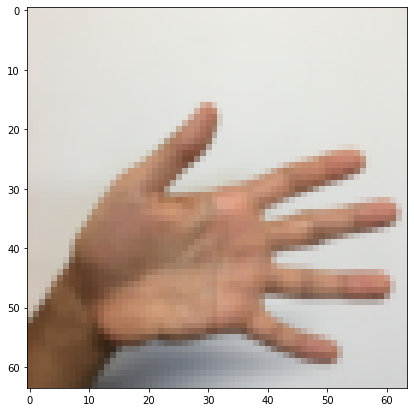

In [15]:
# Example of an image
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(y_train_orig[index]))

y = 2


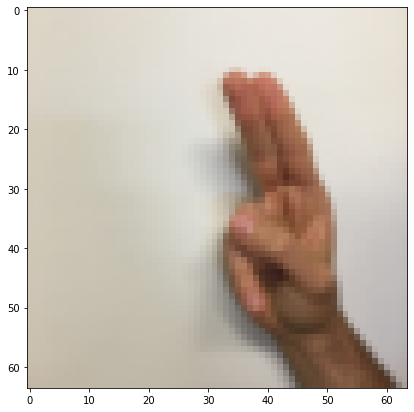

In [16]:
index = 1000
plt.imshow(X_train_orig[index])
print ("y = " + str(y_train_orig[index]))

We have to flatten all images into rows. Each row is one sample. 

So in the training set we have
- $1080$ rows because of $1080$ images
- and each row has $64\times 64\times 3=12,288$ numbers

So in the test set we have
- $120$ rows because of $120$ images
- and each row has $64\times 64\times 3=12,288$ numbers

We also have to use one-hot encoding to transform `y_train_orig` and `y_test_orig`. 

In [17]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1)/255
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1)/255

In [18]:
print("Training set (flatten)")
print("Size of X_train_flatten:", X_train_flatten.shape)

print("\nTest set (flatten)")
print("Size of X_test_flatten:", X_test_flatten.shape)


Training set (flatten)
Size of X_train_flatten: (1080, 12288)

Test set (flatten)
Size of X_test_flatten: (120, 12288)


In [19]:
num_of_training_sample = X_train_flatten.shape[0]
num_of_feature = X_train_flatten.shape[1]

##Activity 1: One-hot encoding

You are supposed to convert `y_train` and `y_test` to matrices using one-hot encoding discussed in the previous semester.

Another method: using [`keras.utils.to_categorical(y, num_classes=None, dtype="float32")`](https://keras.io/api/utils/python_utils/#to_categorical-function)

In [31]:
# Your code

import tensorflow
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train_orig)

y_test = to_categorical(y_test_orig)

In [32]:
print("Training set (y)")
print("Size of y_train:", y_train.shape)

print("\nTest set (y)")
print("Size of y_test:", y_test.shape)

Training set (y)
Size of y_train: (1080, 6)

Test set (y)
Size of y_test: (120, 6)


In [33]:
y_train[1:10]

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [34]:
y_train_orig[1:10]

array([0, 2, 5, 2, 4, 2, 1, 1, 4])

# Building the first neural network




##Activity 2: Build the following ANN:

- input layer -> first hidden layer -> second hidden layer -> output layer

- ReLu is used in the hidden layers

- $40$ neurons in the first hidden layer

- $20$ neuron in the second hidden layer

- He initialization is used

- Adam optimizer is used

You have to decide on the number of neurons of the output layer as well as the activation fucntion used at the layer.


In [42]:
# Your code
my_ANN = Sequential()

my_ANN.add(Dense(40, input_shape = (12288,), activation = 'relu', kernel_initializer = initializers.HeNormal(),
bias_initializer = initializers.Zeros()))
my_ANN.add(Dense(20, activation = 'relu', kernel_initializer = initializers.HeNormal(), bias_initializer = initializers.Zeros()))
my_ANN.add(Dense(6, activation = 'softmax'))

my_ANN.compile(loss = 'categorical_crossentropy',
              optimizer = tensorflow.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ['accuracy'])

history = my_ANN.fit(X_train_flatten, y_train, epochs = 1000, batch_size = 128, verbose = 0, validation_data = (X_test_flatten, y_test))

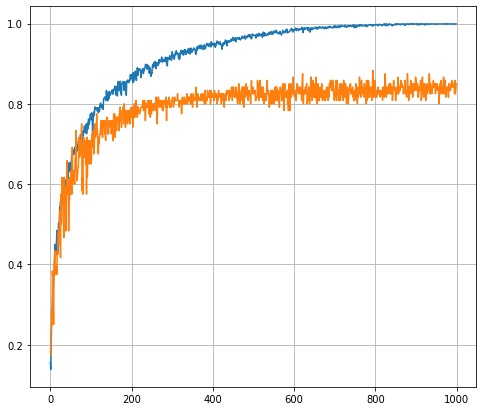

In [46]:
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label='test')
plt.grid()

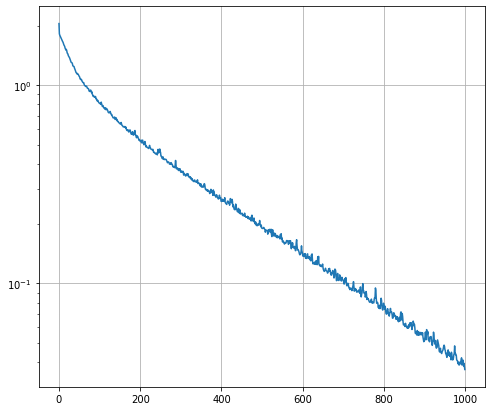

In [44]:
plt.semilogy(history.history["loss"])
plt.grid()

##Activity 3: Check the accuracy on the training set and that on the test set. What conclusion do you draw from these two accuracies?

In [47]:
print("Accuracy on the training set: ", my_ANN.evaluate(X_train_flatten, y_train)[1])

34/34 [==============================] - 0s 4ms/step - loss: 0.0359 - accuracy: 0.9991
Accuracy on the training set:  0.9990741014480591


In [48]:
print("Accuracy on the test set: ", my_ANN.evaluate(X_test_flatten, y_test)[1])

4/4 [==============================] - 0s 6ms/step - loss: 0.3709 - accuracy: 0.8500
Accuracy on the test set:  0.8500000238418579


###Your observation: 
Test set accuracy is lower than training set. Possibly overfit?

#Build the second neural network

##Activity 4: Build the following ANN:

- input layer -> first hidden layer -> second hidden layer -> output layer

- ReLu is used in the hidden layers

- $40$ neurons in the first hidden layer

- $20$ neuron in the second hidden layer

- He initialization is used

- Adam optimizer is used

- L2 regularization (`l2_lambda = 1e-1`)

You have to decide on the number of neurons of the output layer as well as the activation fucntion used at the layer.

In [56]:
# Your code
l2_lambda = 1e-1
my_ANN_L2 = Sequential()
my_ANN_L2.add(Dense(40, input_shape = (12288,), activation = 'relu', kernel_regularizer=regularizers.l2(l2 = l2_lambda), kernel_initializer = initializers.HeNormal(),
bias_initializer = initializers.Zeros()))
my_ANN_L2.add(Dense(20, activation = 'relu', kernel_regularizer=regularizers.l2(l2 = l2_lambda), kernel_initializer = initializers.HeNormal(), bias_initializer = initializers.Zeros()))
my_ANN_L2.add(Dense(6, activation = 'softmax'))

my_ANN.compile(loss = 'categorical_crossentropy',
              optimizer = tensorflow.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ['accuracy'])

my_ANN_L2.compile(loss = 'categorical_crossentropy',
              optimizer = tensorflow.keras.optimizers.Adam(learning_rate=1e-4),
              metrics = ['accuracy'])

history_L2 = my_ANN_L2.fit(X_train_flatten, y_train, epochs = 2000, batch_size = 128, verbose = 0, validation_data=(X_test_flatten, y_test))

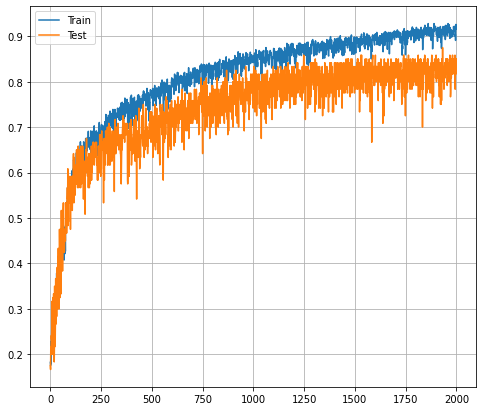

In [57]:
plt.plot(history_L2.history['accuracy'], label="Train")
plt.plot(history_L2.history['val_accuracy'], label = "Test")
plt.legend()
plt.grid()

In [58]:
print("Accuracy on the training set: ", my_ANN_L2.evaluate(X_train_flatten, y_train)[1])
print("Accuracy on the test set: ", my_ANN_L2.evaluate(X_test_flatten, y_test)[1])

34/34 [==============================] - 0s 4ms/step - loss: 0.8849 - accuracy: 0.9019
Accuracy on the training set:  0.9018518328666687
4/4 [==============================] - 0s 5ms/step - loss: 1.0582 - accuracy: 0.8500
Accuracy on the test set:  0.8500000238418579


###Your observation: 
The test data accuracy remains about the same as before without regularization.

##Activity 5: Build the following ANN:

- input layer -> first hidden layer -> second hidden layer -> output layer

- ReLu is used in the hidden layers

- $40$ neurons in the first hidden layer

- $20$ neuron in the second hidden layer

- He initialization is used

- Adam optimizer is used

- L2 regularization (`l2_lambda = 1e-3`)

You have to decide on the number of neurons of the output layer as well as the activation fucntion used at the layer.

In [60]:
# Your code
l2_lambda = 1e-5
my_ANN_L2_2 = Sequential()
my_ANN_L2_2.add(Dense(40, input_shape = (12288,), activation = 'relu', kernel_regularizer=regularizers.l2(l2 = l2_lambda), kernel_initializer = initializers.HeNormal(),
bias_initializer = initializers.Zeros()))
my_ANN_L2_2.add(Dense(20, activation = 'relu', kernel_regularizer=regularizers.l2(l2 = l2_lambda), kernel_initializer = initializers.HeNormal(), bias_initializer = initializers.Zeros()))
my_ANN_L2_2.add(Dense(6, activation = 'softmax'))


my_ANN_L2_2.compile(loss = 'categorical_crossentropy',
              optimizer = tensorflow.keras.optimizers.Adam(learning_rate=1e-4),
              metrics = ['accuracy'])

history_L2_2 = my_ANN_L2_2.fit(X_train_flatten, y_train, epochs = 2000, batch_size = 128, verbose = 0, validation_data=(X_test_flatten, y_test))

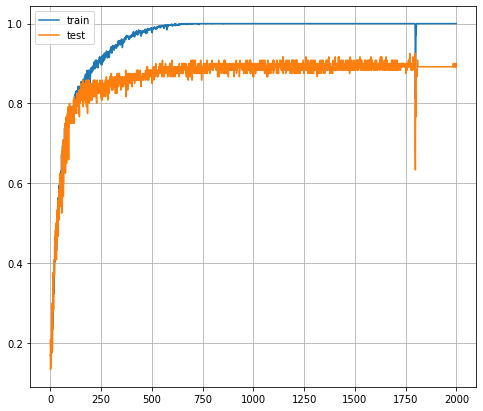

In [61]:
plt.plot(history_L2_2.history['accuracy'], label="train")
plt.plot(history_L2_2.history['val_accuracy'], label="test")
plt.legend()
plt.grid()

In [62]:
print("Accuracy on the training set: ", my_ANN_L2_2.evaluate(X_train_flatten, y_train)[1])
print("Accuracy on the test set: ", my_ANN_L2_2.evaluate(X_test_flatten, y_test)[1])

34/34 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Accuracy on the training set:  1.0
4/4 [==============================] - 0s 6ms/step - loss: 0.4254 - accuracy: 0.8917
Accuracy on the test set:  0.8916666507720947


###Your observation: 
Test set accuracy has improved with regularization L2 lambda=1e-5.